In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)


In [2]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [3]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'C:/Users/Madhur/Desktop/Skin burn analysis (Hackathon)/train'
valid_path = 'C:/Users/Madhur/Desktop/Skin burn analysis (Hackathon)/test'

In [4]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87910968/87910968 [==============================] - 8s 0us/step


In [5]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [7]:
 # useful for getting number of output classes
folders = glob('C:/Users/Madhur/Desktop/Skin burn analysis (Hackathon)/train/*')

In [8]:
folders

['C:/Users/Madhur/Desktop/Skin burn analysis (Hackathon)/train\\degree0',
 'C:/Users/Madhur/Desktop/Skin burn analysis (Hackathon)/train\\degree1',
 'C:/Users/Madhur/Desktop/Skin burn analysis (Hackathon)/train\\degree2']

In [10]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

x = Flatten()(inception.output)

In [11]:
prediction = Dense(3, activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [12]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [13]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [14]:
# Use the Image Data Generator to import the images from the dataset
#Pre-processing of dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [15]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('C:/Users/Madhur/Desktop/Skin burn analysis (Hackathon)/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 920 images belonging to 3 classes.


In [16]:
test_set = test_datagen.flow_from_directory('C:/Users/Madhur/Desktop/Skin burn analysis (Hackathon)/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 540 images belonging to 3 classes.


In [18]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=100,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\Madhur\AppData\Local\Temp\ipykernel_21640\2154879028.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/100
29/29 [==============================] - 27s 927ms/step - loss: 1.0193 - accuracy: 0.7989 - val_loss: 2.4097 - val_accuracy: 0.5722
Epoch 2/100
29/29 [==============================] - 26s 896ms/step - loss: 0.7921 - accuracy: 0.8478 - val_loss: 0.3668 - val_accuracy: 0.9204
Epoch 3/100
29/29 [==============================] - 27s 927ms/step - loss: 0.8516 - accuracy: 0.8315 - val_loss: 0.5857 - val_accuracy: 0.8648
Epoch 4/100
29/29 [==============================] - 30s 1s/step - loss: 0.9000 - accuracy: 0.8326 - val_loss: 0.4466 - val_accuracy: 0.9130
Epoch 5/100
29/29 [==============================] - 30s 1s/step - loss: 0.8136 - accuracy: 0.8663 - val_loss: 1.7329 - val_accuracy: 0.6907
Epoch 6/100
29/29 [==============================] - 29s 1s/step - loss: 0.9388 - accuracy: 0.8348 - val_loss: 0.9487 - val_accuracy: 0.8222
Epoch 7/100
29/29 [==============================] - 28s 963ms/step - loss: 0.7577 - accuracy: 0.8707 - val_loss: 0.3281 - val_accuracy: 0.9444
E

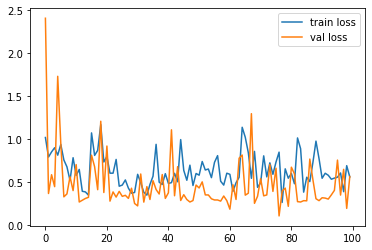

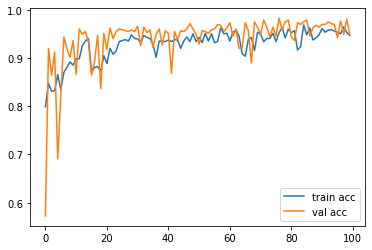

In [19]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [20]:
import pickle

In [21]:
with open ('inceptionv3_pickel','wb') as f:  #used to store model r just like we store something in a box
    pickle.dump(r,f)
    

INFO:tensorflow:Assets written to: ram://f044237a-0213-4f1b-b040-7aa731fd0066/assets


INFO:tensorflow:Assets written to: ram://f044237a-0213-4f1b-b040-7aa731fd0066/assets
